In [194]:
# Kratak uvod: Ovaj program koristi vestacku neuronsku mrezu zvanu Long Short Term Memory (LSTM) da bi predvideo krajnju
# dnevnu cenu Apple kompanije koristeci close cene 60 prethodnih dana

In [195]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [196]:
# Dobavljanje podataka
df = web.DataReader('AAPL', data_source='yahoo', start='2010-01-01', end='2020-07-06')

In [197]:
# Prikazivanje podataka
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,30.642857,30.340000,30.490000,30.572857,123432400.0,26.466835
2010-01-05,30.798571,30.464285,30.657143,30.625713,150476200.0,26.512596
2010-01-06,30.747143,30.107143,30.625713,30.138571,138040000.0,26.090879
2010-01-07,30.285715,29.864286,30.250000,30.082857,119282800.0,26.042646
2010-01-08,30.285715,29.865715,30.042856,30.282858,111902700.0,26.215786
...,...,...,...,...,...,...
2020-06-29,362.170013,351.279999,353.250000,361.779999,32661500.0,361.779999
2020-06-30,365.980011,360.000000,360.079987,364.799988,35055800.0,364.799988
2020-07-01,367.359985,363.910004,365.119995,364.109985,27684300.0,364.109985


In [198]:
df.shape

(2644, 6)

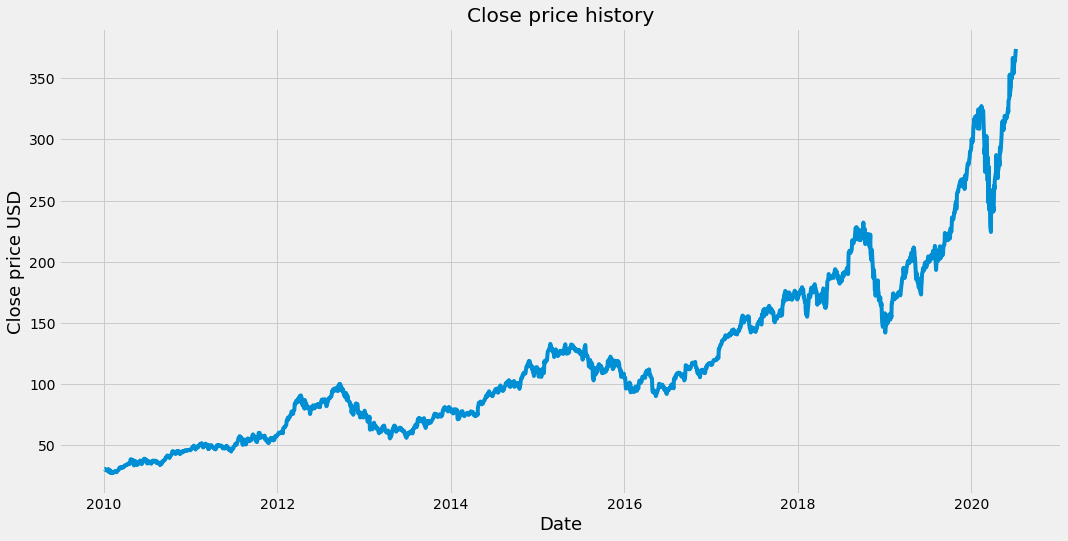

In [199]:
# Vizualizacija
plt.figure(figsize=(16,8))
plt.title('Close price history')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close price USD', fontsize=18)
plt.show()

In [200]:
data = df.filter(['Close'])

dataset = data.values

In [201]:
# duzina trening skupa je 80% celoukupne duzine

training_data_len = math.ceil(len(dataset) * 0.8)

training_data_len

2116

In [202]:
# skaliranje podataka na interval [0,1], bolji rezultat u ovom slucaju u odnosu na neskalirane podatke

scaler = MinMaxScaler(feature_range=(0, 1))

scaled_data = scaler.fit_transform(dataset)

In [203]:
scaled_data

array([[0.00905604],
       [0.00920862],
       [0.00780238],
       ...,
       [0.97188332],
       [0.97188332],
       [1.        ]])

In [204]:
# Definisanje trening skupa

train_data = scaled_data[0: training_data_len, :]

x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60: i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([9.05604145e-03, 9.20862304e-03, 7.80238036e-03, 7.64155081e-03,
       8.21889640e-03, 7.44772946e-03, 6.46212129e-03, 7.67041864e-03,
       7.16730462e-03, 5.72394615e-03, 9.48079994e-03, 8.11579701e-03,
       6.60645493e-03, 2.35061110e-03, 4.54451663e-03, 5.72807013e-03,
       6.52810490e-03, 2.98568684e-03, 4.12397572e-06, 1.10519796e-03,
       1.57119621e-03, 2.96094299e-03, 0.00000000e+00, 1.40624268e-03,
       8.53640950e-04, 1.70728741e-03, 1.26603302e-03, 2.73000585e-03,
       3.43518918e-03, 4.68060232e-03, 4.33007540e-03, 4.48678097e-03,
       3.96717104e-03, 3.45168509e-03, 2.06606228e-03, 3.55066050e-03,
       4.10326224e-03, 5.18371635e-03, 6.98585519e-03, 6.92811953e-03,
       7.12606486e-03, 7.69516250e-03, 1.10932414e-02, 1.11468476e-02,
       1.27716610e-02, 1.35222025e-02, 1.37943849e-02, 1.42480113e-02,
       1.31098160e-02, 1.33613730e-02, 1.32252873e-02, 1.34438525e-02,
       1.24541204e-02, 1.34850923e-02, 1.49738090e-02, 1.53903250e-02,
     

In [205]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [206]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(2056, 60, 1)

In [207]:
# LSTM model, neuronska mreza sacinjena od 4 sloja

model = Sequential()

# prvi(ulazni) LSTM sloj sacinjen od 50 neurona, ulaz dimenzija 60x1
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# drugi LSTM sloj sacinjen od takodje 50 neurona
model.add(LSTM(50, return_sequences=False))

# dense sloj sacinjen od 25 neurona
model.add(Dense(25))

# izlazni dense sloj
model.add(Dense(1))

In [208]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Treniranje modela, u ovom slucaju veoma dobre rezultate daje samo 1 epoha tj. dovoljno je da se samo jednom svi podaci
# provuku kroz gore definisani model
# Koriscenjem vise epoha rezultati u slucaju Apple kompanije budu znatno losiji

model.fit(x_train, y_train, batch_size=1, epochs=1)

Epoch 1/1
   7/2056 [..............................] - ETA: 4:07 - loss: 0.0167

In [ ]:
# Definisanje test skupa

test_data = scaled_data[training_data_len-60: , :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [187]:
# Racunanje greske - Root mean squared error

rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

13.237463575420957

In [188]:
# Plot

train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


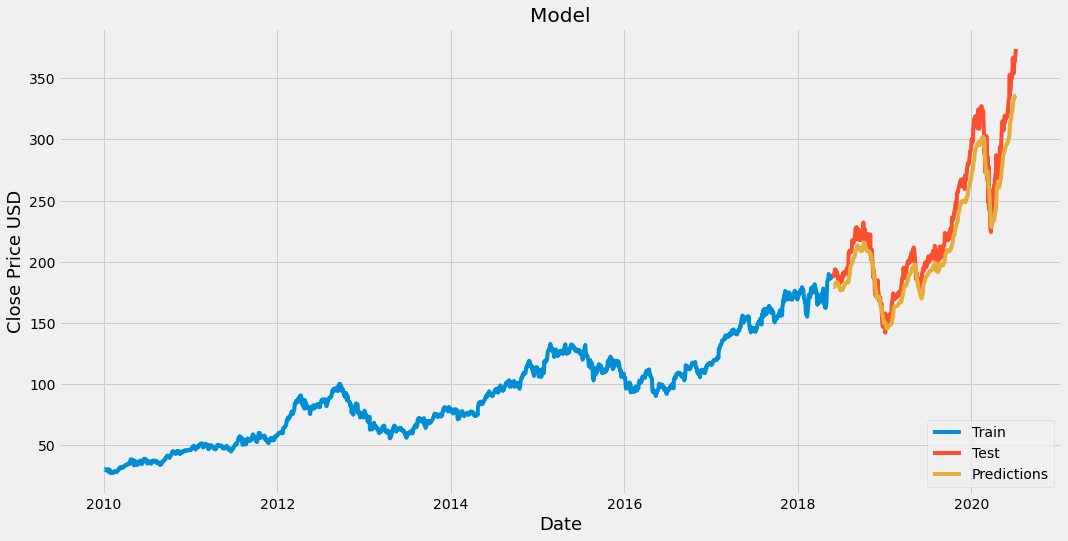

In [189]:
# Vizualizacija

plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='lower right')
plt.show()

In [190]:
valid

,Close,Predictions
Date,,
2018-05-31,186.869995,179.539398
2018-06-01,190.240005,179.414154
2018-06-04,191.830002,179.686417
2018-06-05,193.309998,180.300873
2018-06-06,193.979996,181.177963
...,...,...
2020-06-29,361.779999,333.202057
2020-06-30,364.799988,333.735168
2020-07-01,364.109985,334.676605


In [191]:
# Predikcija za 7.7.2020., close cena ce biti dostupna oko 16:00h 

apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-07-06')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)

X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
x_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

pred_price = model.predict(X_test)

pred_price = scaler.inverse_transform(pred_price)

In [192]:
print(f'Predvidjena close cena za 7.7.2020. je {pred_price[0][0]} $')

Predvidjena close cena za 7.7.2020. je 338.1521301269531 $


In [193]:
# Pokrenuti 7.7.2020 posle 16:00h i uporediti
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2020-07-07')
print(apple_quote2['Close'])

Date
2012-01-03     58.747143
2012-01-04     59.062859
2012-01-05     59.718571
2012-01-06     60.342857
2012-01-09     60.247143
                 ...    
2020-06-29    361.779999
2020-06-30    364.799988
2020-07-01    364.109985
2020-07-02    364.109985
2020-07-06    373.850006
Name: Close, Length: 2140, dtype: float64
